In [2]:
from pathlib import Path
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
import numpy as np

from lib import core, analysis
from lib.core import Core
from lib import analysis

%matplotlib widget

# Vue d'ensemble

Ce dashboard donne une vue d'ensemble sur les progrès en terme d'analyse et de développement de solutions d'algorithmes de hachage flous.

In [3]:
data = Path("./data")
core = Core(data)

Les algorithmes actuellements supportés sont : 

In [4]:
core.runners()

['lzjd', 'tlsh', 'nilsimsa', 'ssdeep', 'sdhash']

Les benchmarks qui ont été développé sont : 

In [5]:
core.benchmarks()

['image', 'noise', 'noise_images', 'text']

In [6]:
def run(runner, benchmark):
    df = core.run([runner], [benchmark])
    return analysis.pretty(df)


Configuration de base pour visualiser les résultats d'un algorithme donné.

In [7]:
vis_spec_single_runner = r"""{"config":[{"config":{"defaultAggregated":false,"geoms":["circle"],"coordSystem":"generic","limit":-1,"timezoneDisplayOffset":0},"encodings":{"dimensions":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"ref","name":"ref","basename":"ref","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mods","name":"mods","basename":"mods","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"algo","name":"algo","basename":"algo","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0}],"columns":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0}],"color":[{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0}],"opacity":[],"size":[],"shape":[],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0}],"filters":[{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0,"rule":{"type":"one of","value":["image"]}}],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":true,"size":{"mode":"full","width":320,"height":200},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false}},"visId":"gw_DCxV","name":"Image - Format impact"},{"config":{"defaultAggregated":false,"geoms":["circle"],"coordSystem":"generic","limit":-1,"timezoneDisplayOffset":0},"encodings":{"dimensions":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"ref","name":"ref","basename":"ref","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mods","name":"mods","basename":"mods","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"algo","name":"algo","basename":"algo","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0}],"columns":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0}],"color":[{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0}],"opacity":[],"size":[],"shape":[],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0}],"filters":[{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0,"rule":{"type":"one of","value":["text"]}}],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":true,"size":{"mode":"full","width":320,"height":200},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false}},"visId":"gw_bwdB","name":"Text"}],"chart_map":{},"workflow_list":[{"workflow":[{"type":"filter","filters":[{"fid":"bench","rule":{"type":"one of","value":["image"]}}]},{"type":"view","query":[{"op":"raw","fields":["suffix","mod","modval","alt","dist"]}]}]},{"workflow":[{"type":"filter","filters":[{"fid":"bench","rule":{"type":"one of","value":["text"]}}]},{"type":"view","query":[{"op":"raw","fields":["suffix","mod","modval","alt","dist"]}]}]}],"version":"0.4.9.13"}"""
def basic_single_runner_analysis(*runners):
    df = analysis.pretty(core.run(runners, core.benchmarks()))
    df = analysis.long(df)
    return pyg.walk(df, spec=vis_spec_single_runner)


#### Indicators
We used for comparisons between the algorithms 5 indicators:
- False positive rate: the fraction of pairs of dissimilar files juged similar by our algorithm
- Recall: = 1 - False negative rate, the fraction of pairs of similar files juged similar by our algorithm
- Precision: the fraction of pairs of similar files among the pairs juged similars by our algorithm
- Global precision: the fraction of pairs of files that were correctly juged by our algorithm among every pair
- False negative rate: the fraction of pairs of similar files juged dissimilar by our algorithm

They are calculated with the class Indicators(df_similar, df_non_similar, threshold) where df_similar (resp df_non_similar) is the dataframe containing the results of the algorithm on a benchmark with pairs of similar files (resp non_similar).

In [8]:
def indicators_based_analysis(runner, bench_similar, bench_non_similar, suffix=None):
    pos = run(runner, bench_similar) 
    neg = run(runner, bench_non_similar) 

    if suffix:
        pos = pos[pos['suffix'] == suffix]
        neg = neg[neg['suffix'] == suffix]

    return analysis.indicators_based_analysis_on_dfs(pos,neg)

# SSDeep performances

In [ ]:
basic_single_runner_analysis('ssdeep')

## Short texts (~30 Ko)

Running ['ssdeep'] with benchs ['text']
Running ['ssdeep'] with benchs ['noise']


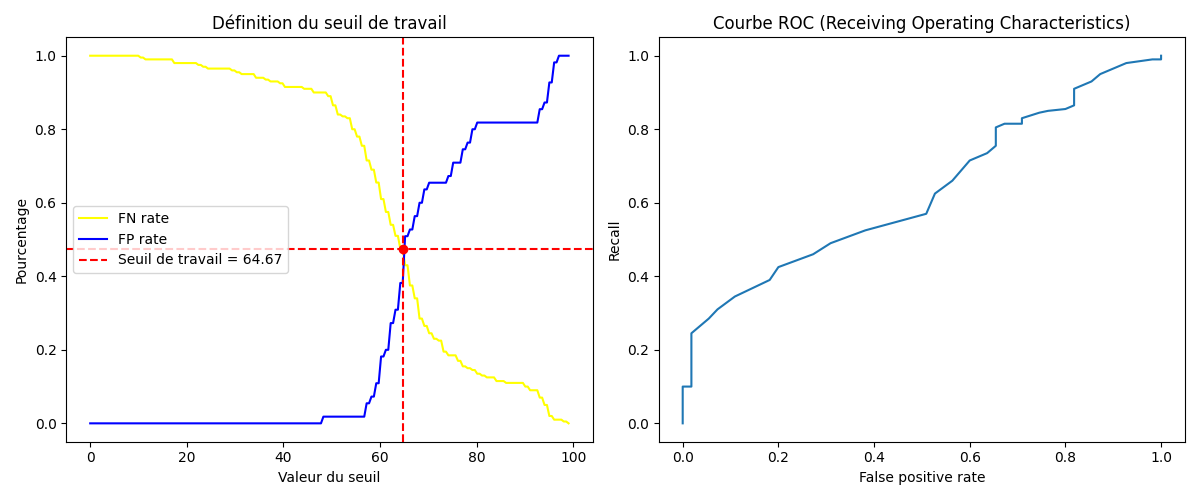

In [10]:
threshold_ssdeep_text, indicators_ssdeep_text = indicators_based_analysis('ssdeep', 'text', 'noise')

In [12]:
for key, value in vars(indicators_ssdeep_text).items():
    print(f"{key}: {value}")

fp_len: 55
fn_len: 200
fp_count: 21
fn_count: 95
tn_count: 34
tp_count: 105
fn_rate: 0.475
fp_rate: 0.38181818181818183
global_precision: 0.5450980392156862
precision: 0.8333333333333334
recall: 0.525


## Images

### .bmp files

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']


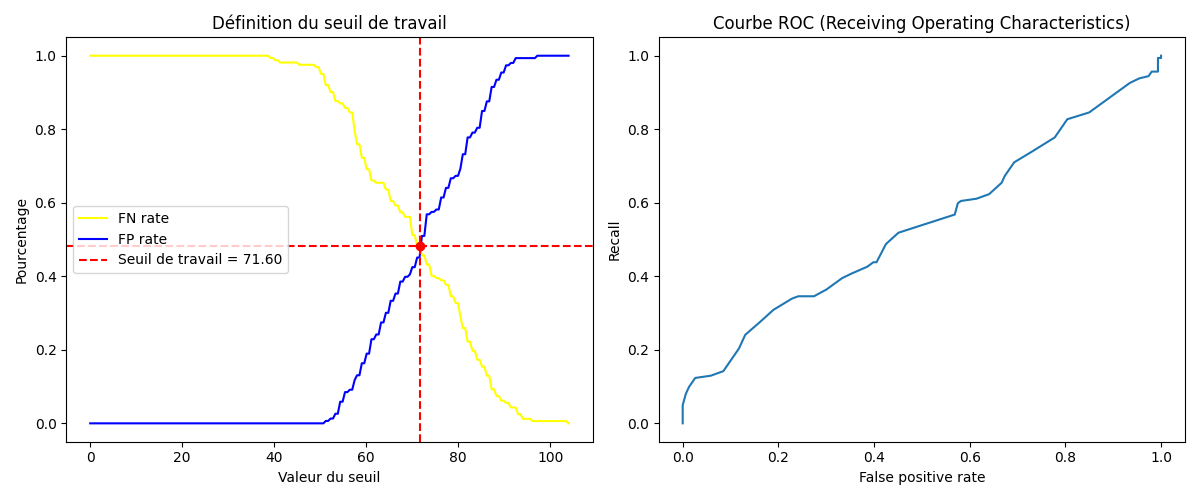

In [14]:
threshold_ssdeep_bmp, indicators_ssdeep_bmp = indicators_based_analysis('ssdeep', 'image', 'noise_images', suffix="bmp")

In [15]:
for key,value in vars(indicators_ssdeep_bmp).items():
    print(f"{key}:{value}")

fp_len:153
fn_len:162
fp_count:69
fn_count:78
tn_count:84
tp_count:84
fn_rate:0.48148148148148145
fp_rate:0.45098039215686275
global_precision:0.5333333333333333
precision:0.5490196078431373
recall:0.5185185185185185


### .jpg files

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']


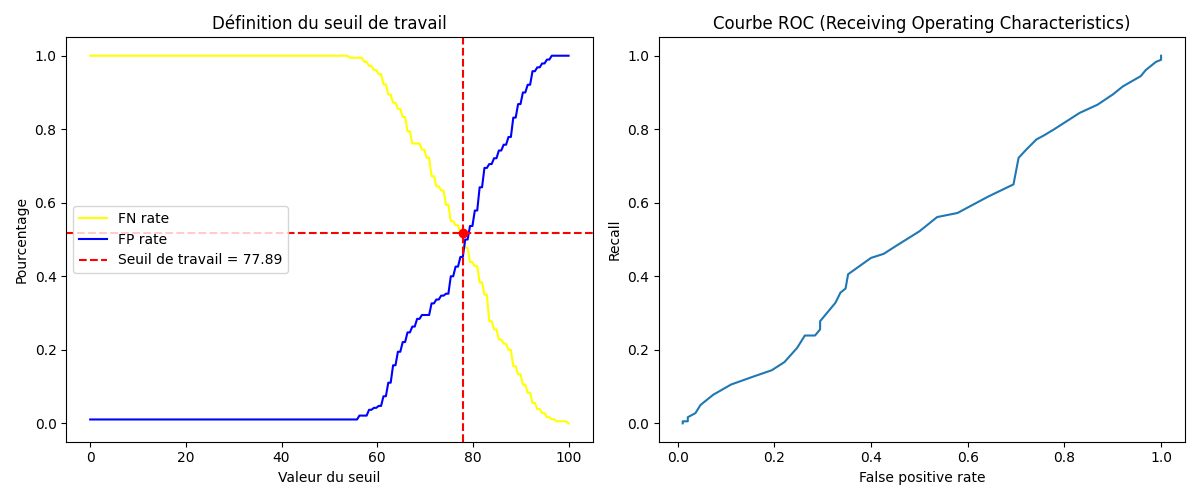

In [16]:
threshold_ssdeep_jpg, indicators_ssdeep_jpg = indicators_based_analysis('ssdeep', 'image', 'noise_images', suffix="jpg")

In [17]:
for key, value in vars(indicators_ssdeep_jpg).items():
    print(f"{key}:{value}")

fp_len:190
fn_len:180
fp_count:86
fn_count:93
tn_count:104
tp_count:87
fn_rate:0.5166666666666667
fp_rate:0.45263157894736844
global_precision:0.5162162162162162
precision:0.5028901734104047
recall:0.48333333333333334


### .png files

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']


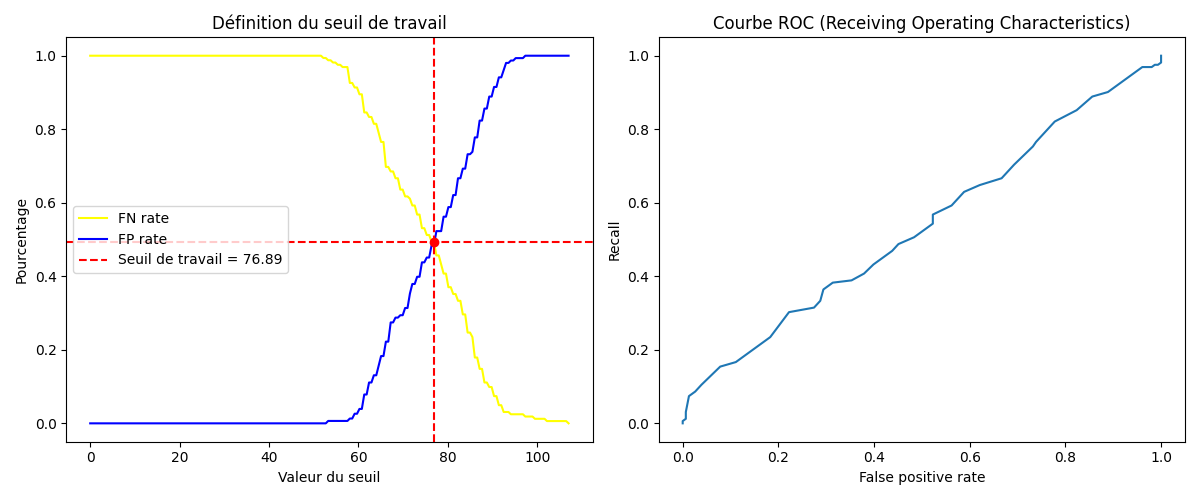

In [19]:
threshold_ssdeep_png, indicators_ssdeep_png = indicators_based_analysis('ssdeep', 'image', 'noise_images', suffix="png")

In [20]:
for key, value in vars(indicators_ssdeep_png).items():
    print(f"{key}:{value}")

fp_len:153
fn_len:162
fp_count:74
fn_count:80
tn_count:79
tp_count:82
fn_rate:0.49382716049382713
fp_rate:0.48366013071895425
global_precision:0.5111111111111111
precision:0.5256410256410257
recall:0.5061728395061729
